In [1]:
import torch
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.decomposition import PCA

from ae import AE

Loading model.

In [2]:
ae2, ae10 = AE(device='cpu', latent_dim=2), AE(device='cpu', latent_dim=10)

In [3]:
model2 = torch.load('best_models/autoencoder_ld2_datasets.pth', map_location=torch.device('cpu'), weights_only=True)
model10 = torch.load('best_models/autoencoder_ld10_datasets.pth', map_location=torch.device('cpu'), weights_only=True)

ae2.load_state_dict(model2)
ae10.load_state_dict(model10)

<All keys matched successfully>

## Learning Curves

Plotting learning curves.

In [4]:
loss2 = np.load('best_models/loss_autoencoder_ld2_datasets.npy')
loss10 = np.load('best_models/loss_autoencoder_ld10_datasets.npy')

epochs2 = [i for i in range(loss2.shape[0])]
epochs10 = [i for i in range(loss10.shape[0])]

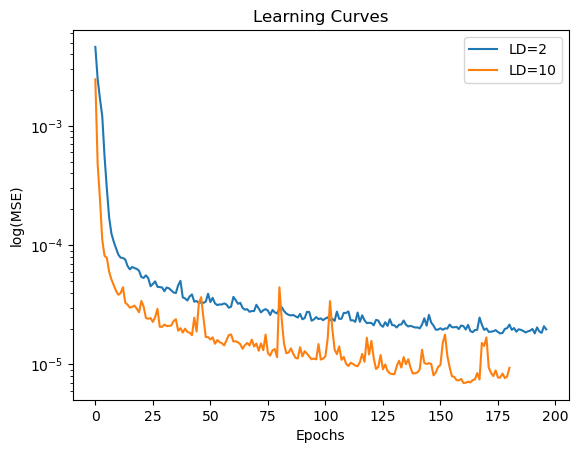

In [5]:
plt.plot(epochs2, loss2, label='LD=2')
plt.plot(epochs10, loss10, label='LD=10')

plt.yscale('log')
plt.ylabel('log(MSE)')
plt.xlabel('Epochs')
plt.title('Learning Curves')
plt.legend()
plt.show()

## Model avaliation

Loading data.

In [6]:
data_auau = np.load('tipAu_Au_morl.npz')['wavelets']
data_ausio2 = np.load('tipAu_SiO2_morl.npz')['wavelets']
data_ligcl = np.load('tipLig_CL_morl.npz')['wavelets']
data_ligsio2 = np.load('tipLig_SiO2_morl.npz')['wavelets']

data_auau = torch.tensor(data_auau, dtype=torch.float32).unsqueeze(1)
data_ausio2 = torch.tensor(data_ausio2, dtype=torch.float32).unsqueeze(1)
data_ligcl = torch.tensor(data_ligcl, dtype=torch.float32).unsqueeze(1)
data_ligsio2 = torch.tensor(data_ligsio2, dtype=torch.float32).unsqueeze(1)

data = torch.concatenate([data_auau, data_ausio2, data_ligcl, data_ligsio2])
data /= data.max()

Testing.

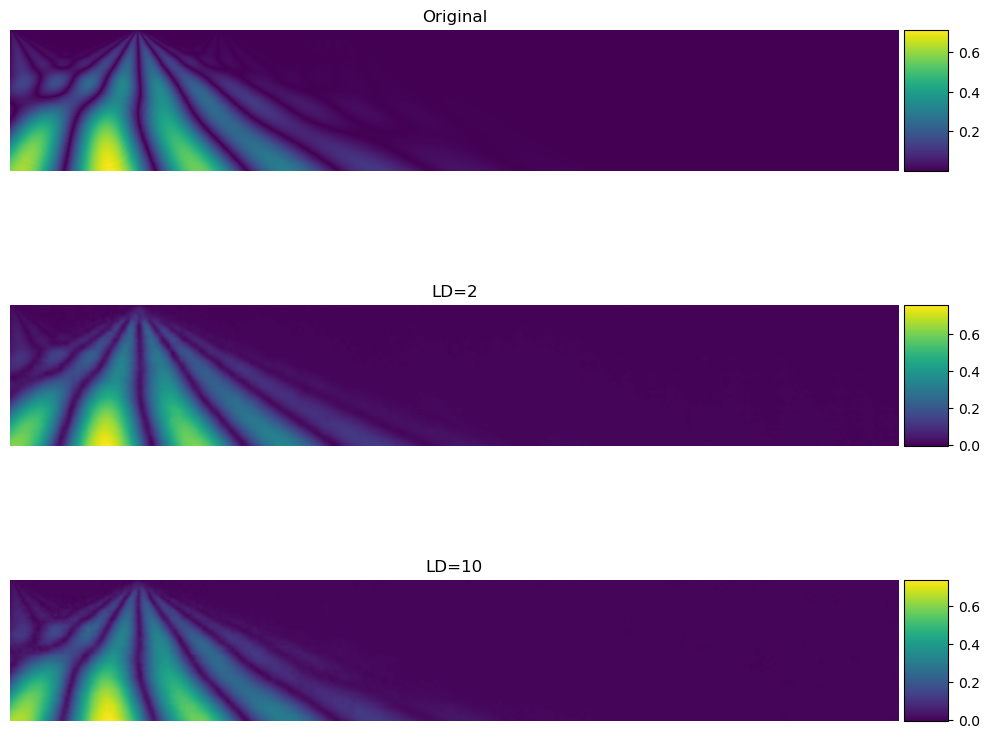

In [7]:
wave0 = data[0]

with torch.no_grad():
    wave0_pred2 = ae2(wave0.unsqueeze(0))
    wave0_pred10 = ae10(wave0.unsqueeze(0))

fig, ax = plt.subplots(3, 1, figsize=(10, 9))

im0 = ax[0].imshow(wave0.squeeze())
ax[0].axis('off')
ax[0].set_title('Original')
divider = make_axes_locatable(ax[0])
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im0, cax=cax)

im1 = ax[1].imshow(wave0_pred2.squeeze())
ax[1].axis('off')
ax[1].set_title('LD=2')
divider = make_axes_locatable(ax[1])
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im1, cax=cax)

im1 = ax[2].imshow(wave0_pred10.squeeze())
ax[2].axis('off')
ax[2].set_title('LD=10')
divider = make_axes_locatable(ax[2])
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im1, cax=cax)

plt.tight_layout()
plt.show()

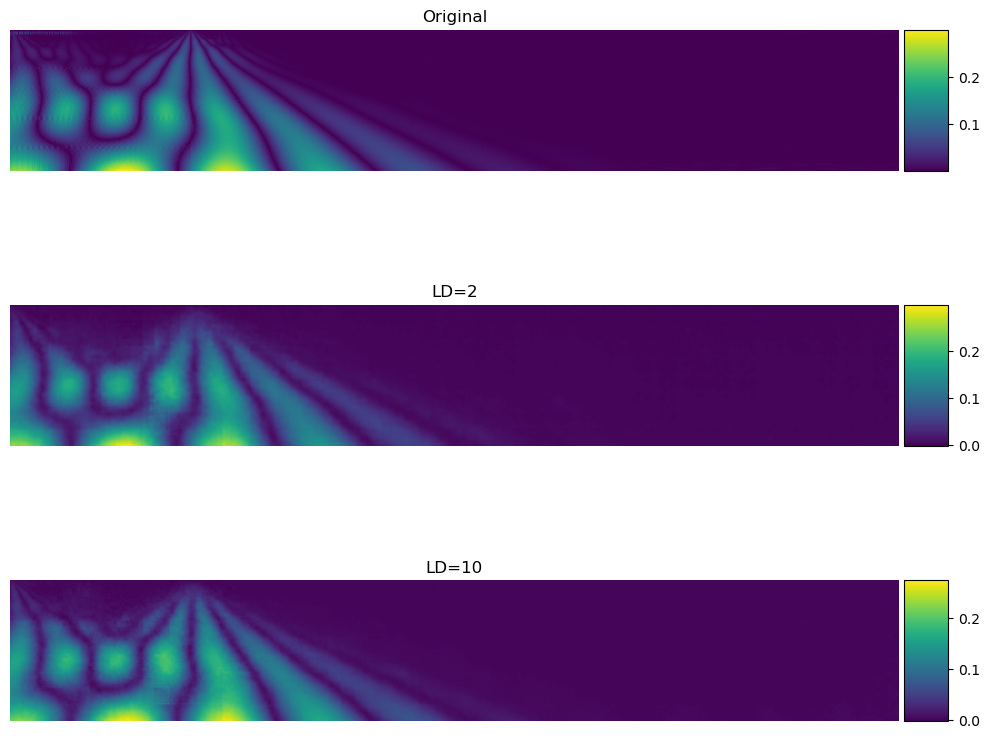

In [8]:
wave15 = data[15]

with torch.no_grad():
    wave15_pred2 = ae2(wave15.unsqueeze(0))
    wave15_pred10 = ae10(wave15.unsqueeze(0))

fig, ax = plt.subplots(3, 1, figsize=(10, 9))

im0 = ax[0].imshow(wave15.squeeze())
ax[0].axis('off')
ax[0].set_title('Original')
divider = make_axes_locatable(ax[0])
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im0, cax=cax)

im1 = ax[1].imshow(wave15_pred2.squeeze())
ax[1].axis('off')
ax[1].set_title('LD=2')
divider = make_axes_locatable(ax[1])
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im1, cax=cax)

im1 = ax[2].imshow(wave15_pred10.squeeze())
ax[2].axis('off')
ax[2].set_title('LD=10')
divider = make_axes_locatable(ax[2])
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im1, cax=cax)

plt.tight_layout()
plt.show()

## Latent Space

Plotting the latent space for the different AEs.

In [9]:
loader_auau = DataLoader(data_auau, batch_size=128, shuffle=True)
loader_ausio2 = DataLoader(data_ausio2, batch_size=128, shuffle=True)
loader_ligcl = DataLoader(data_ligcl, batch_size=128, shuffle=True)
loader_ligsio2 = DataLoader(data_ligsio2, batch_size=128, shuffle=True)

In [13]:
ld2_auau = []

for x_batch in loader_auau:
    x_pred = ae2.encoder(x_batch)
    ld2_auau.append(x_pred)

ld2_auau = torch.concatenate(ld2_auau)

In [14]:
ld2_ausio2 = []

for x_batch in loader_ausio2:
    x_pred = ae2.encoder(x_batch)
    ld2_ausio2.append(x_pred)

ld2_ausio2 = torch.concatenate(ld2_ausio2)

In [15]:
ld2_ligcl = []

for x_batch in loader_ligcl:
    x_pred = ae2.encoder(x_batch)
    ld2_ligcl.append(x_pred)

ld2_ligcl = torch.concatenate(ld2_ligcl)

In [ ]:
ld2_ligsio2 = []

for x_batch in loader_ligsio2:
    x_pred = ae2.encoder(x_batch)
    ld2_ligsio2.append(x_pred)

ld2_ligsio2 = torch.concatenate(ld2_ligsio2)

In [ ]:
plt.scatter(ld2_auau[:, 0].detach(), ld2_auau[:, 1].detach(), label='TipAu-Au', c='blue')
plt.scatter(ld2_ausio2[:, 0].detach(), ld2_ausio2[:, 1].detach(), label='TipAu-SiO2', c='red')
plt.scatter(ld2_ligcl[:, 0].detach(), ld2_ligcl[:, 1].detach(), label='TipLig-CL', c='green')
plt.scatter(ld2_ligsio2[:, 0].detach(), ld2_ligsio2[:, 1].detach(), label='TipLig-SiO2', c='orange')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('Latent Dimension with LD=2')
plt.legend()
plt.show()

In [16]:
ld10 = ae10.encoder(data)

pca = PCA(n_components=2)
ld10_pca = pca.fit_transform(ld10.detach())

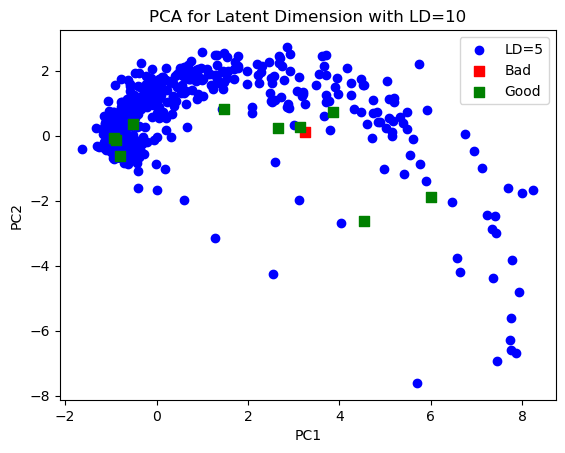

In [17]:
good_idx = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
bad_idx = [15]

plt.scatter(ld10_pca[:, 0], ld10_pca[:, 1], label='LD=5', c='blue')
plt.scatter(ld10_pca[bad_idx, 0], ld10_pca[bad_idx, 1], label='Bad', c='red', marker='s', s=50.)
plt.scatter(ld10_pca[good_idx, 0], ld10_pca[good_idx, 1], label='Good', c='green', marker='s', s=50.)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA for Latent Dimension with LD=10')
plt.legend()
plt.show()